In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from sci378 import *

Version:  0.0.18


In [3]:
from lmfit import *

- For each urban station
    - find slope
    - whether urban or rural
    - closest rural
        - find slope


In [5]:
data=pd.read_csv('data/crichton/time series data pandas.csv.zip')
data.head()

,time,ALBERNI_ROBERTSON_CREEK,VAL_D'OR,WADI_HALFA,SETTAT,SAN_JUAN_DE_LA_MAGUANA,REVELSTOKE_A,LONDON_INT'L_AIRPORT,EUFAULA_WILDLIFE_REF,OAK_MOUNTAIN_CALIFORNIA,...,SANTIAGO_COMPOSTELA,HEMLOCK,LONGVIEW_E_TX_RGNL_AP,LITTLE_SNOWY_MONTANA,YOUNG_POST_OFFICE,KEM,JINGHONG,ICH'ON,VICTORIA_VICTORIA,IRON_RIVER
0,1880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1881,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1883,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1884,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
# Brightness > 10 = urban
station_data=pd.read_excel('data/crichton/station_info.xlsx')
station_data.head(20)

,ID,Station,Latitude,Longitude,Brightness,Elevation
0,ACW00011604,SAVE,57.7667,11.8667,45.0,18.0
1,AE000041196,SHARJAH_INTER_AIRP,25.3330,55.5170,39.0,34.0
2,AEM00041184,RAS_AL_KHAIMAH_INTE,25.6170,55.9330,17.0,31.0
3,AEM00041194,DUBAI_INTL,25.2550,55.3640,104.0,10.4
4,AEM00041216,ABU_DHABI_BATEEN_AIR,24.4300,54.4700,114.0,3.0
5,AEM00041217,ABU_DHABI_INTL,24.4330,54.6510,39.0,26.8
6,AEM00041218,AL_AIN_INTL,24.2620,55.6090,27.0,264.9
7,AFM00040911,MAZAR_I_SHARIF,36.7000,67.2000,0.0,378.0
8,AFM00040938,HERAT,34.2100,62.2280,0.0,977.2
9,AFM00040948,KABUL_INTL,34.5660,69.2120,0.0,1791.3


In [9]:
len(station_data)

19810

## find slope

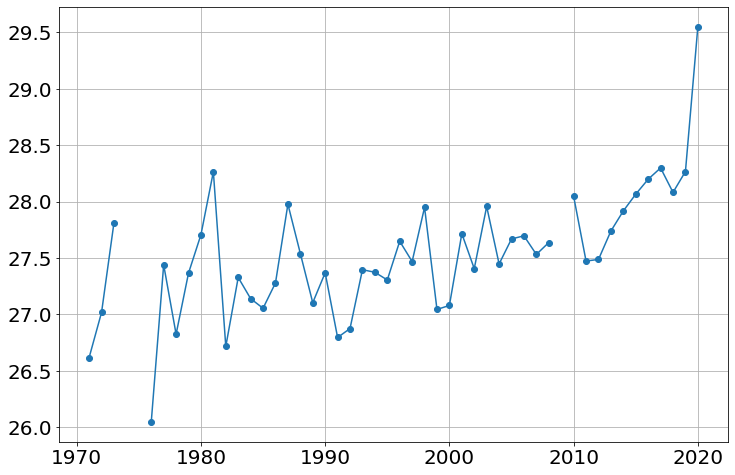

In [14]:
name="SAVE"
time=data['time']
temp=data[name]
plot(time,temp,'-o')

In [13]:
temp

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
         ...    
136    28.198333
137    28.298333
138    28.081667
139    28.266667
140    29.550000
Name: SAVE, Length: 141, dtype: float64

In [22]:
def get_slope(name,display=False):
    x=data['time']
    y=data[name].dropna()
    x=data['time'][y.index]
    
    mymodel=models.LinearModel()
    params=mymodel.make_params()
    result = mymodel.fit(y, params, x=x)
    slope=result.params['slope'].value    
    if display:
        plot(x,y,'-o')

        xx=linspace(min(x),max(x),100)
        yy=result.eval(x=xx)
        plot(xx,yy,'-')
        title(f'Station={name} Slope={slope}')        
    
    return slope

0.024952093266052744

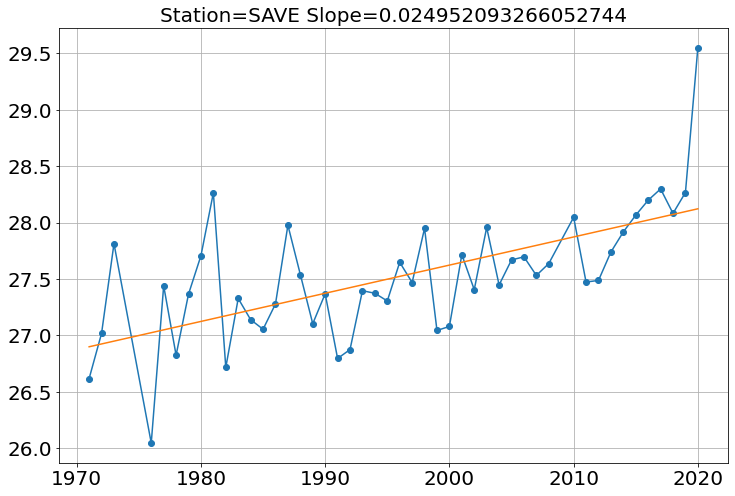

In [23]:
get_slope("SAVE",display=True)

In [24]:
name

'SAVE'

In [28]:
station_data['Brightness'][station_data['Station']==name]>=10

0    True
Name: Brightness, dtype: bool

In [40]:
array((station_data['Brightness'][station_data['Station']==name]>=10))[0]

True

In [41]:
def isurban(name):
    if array((station_data['Brightness'][station_data['Station']==name]>=10))[0]:
        return True
    else:
        return False

In [67]:
def latitude(name=None):
    if name is None:
        return array(station_data['Latitude'])
    else:
        return array(station_data['Latitude'][station_data['Station']==name])[0]
def longitude(name=None):
    if name is None:
        return array(station_data['Longitude'])
    else:
        return array(station_data['Longitude'][station_data['Station']==name])[0]


In [68]:
latitude("SAVE"),longitude("SAVE")

(57.7667, 11.8667)

In [69]:
latitude()

array([ 57.7667,  25.333 ,  25.617 , ..., -17.83  , -18.98  , -19.43  ])

In [70]:
d2=(latitude()-latitude("SAVE"))**2+(longitude()-longitude("SAVE"))**2
argmin(d2)

0

In [59]:
min_dist=1e500
min_name=None
name="SAVE"
lat=latitude(name)
long=longitude(name)



for index,row in station_data.iterrows():
    if row.Station==name:
        continue
        
    d2=(lat-latitude(row.Station))**2+(long-longitude(row.Station))**2
    if d2<min_dist:
        min_dist=d2
        min_name=row.Station
    




In [57]:
row.Station

'SAVE'

In [42]:
isurban("SAVE")

True

In [43]:
isurban("HERAT")

False

In [44]:
station_data['Latitude']

0        57.7667
1        25.3330
2        25.6170
3        25.2550
4        24.4300
          ...   
19805   -20.2000
19806   -22.2170
19807   -17.8300
19808   -18.9800
19809   -19.4300
Name: Latitude, Length: 19810, dtype: float64

In [60]:
station_data.T

,0,1,2,3,4,5,6,7,8,9,...,19800,19801,19802,19803,19804,19805,19806,19807,19808,19809
ID,ACW00011604,AE000041196,AEM00041184,AEM00041194,AEM00041216,AEM00041217,AEM00041218,AFM00040911,AFM00040938,AFM00040948,...,ZI000067889,ZI000067964,ZI000067965,ZI000067969,ZI000067975,ZI000067983,ZI000067991,ZIXLT371333,ZIXLT443557,ZIXLT622116
Station,SAVE,SHARJAH_INTER_AIRP,RAS_AL_KHAIMAH_INTE,DUBAI_INTL,ABU_DHABI_BATEEN_AIR,ABU_DHABI_INTL,AL_AIN_INTL,MAZAR_I_SHARIF,HERAT,KABUL_INTL,...,WYANGA,BULAWAYO_GOETZ_OBS,BULAWAYO_AIRPORT,WEST_NICHOLSON,MASVINGO,CHIPINGE,BEITBRIDGE,HARARE_BELVEDERE,GRAND_REEF,GWELO
Latitude,57.7667,25.333,25.617,25.255,24.43,24.433,24.262,36.7,34.21,34.566,...,-18.283,-20.15,-20.017,-21.05,-20.067,-20.2,-22.217,-17.83,-18.98,-19.43
Longitude,11.8667,55.517,55.933,55.364,54.47,54.651,55.609,67.2,62.228,69.212,...,32.75,28.617,28.617,29.367,30.867,32.616,30.0,31.02,32.45,29.75
Brightness,45.0,39.0,17.0,104.0,114.0,39.0,27.0,0.0,0.0,0.0,...,0.0,17.0,0.0,0.0,0.0,0.0,8.0,24.0,0.0,12.0
Elevation,18.0,34.0,31.0,10.4,3.0,26.8,264.9,378.0,977.2,1791.3,...,1880.0,1344.0,1326.0,861.0,1095.0,1132.0,457.0,1471.0,1018.0,1411.0


In [61]:
S=station_data.T
S.columns=station_data.Station

In [62]:
S

Station,SAVE,SHARJAH_INTER_AIRP,RAS_AL_KHAIMAH_INTE,DUBAI_INTL,ABU_DHABI_BATEEN_AIR,ABU_DHABI_INTL,AL_AIN_INTL,MAZAR_I_SHARIF,HERAT,KABUL_INTL,...,WYANGA,BULAWAYO_GOETZ_OBS,BULAWAYO_AIRPORT,WEST_NICHOLSON,MASVINGO,CHIPINGE,BEITBRIDGE,HARARE_BELVEDERE,GRAND_REEF,GWELO
ID,ACW00011604,AE000041196,AEM00041184,AEM00041194,AEM00041216,AEM00041217,AEM00041218,AFM00040911,AFM00040938,AFM00040948,...,ZI000067889,ZI000067964,ZI000067965,ZI000067969,ZI000067975,ZI000067983,ZI000067991,ZIXLT371333,ZIXLT443557,ZIXLT622116
Station,SAVE,SHARJAH_INTER_AIRP,RAS_AL_KHAIMAH_INTE,DUBAI_INTL,ABU_DHABI_BATEEN_AIR,ABU_DHABI_INTL,AL_AIN_INTL,MAZAR_I_SHARIF,HERAT,KABUL_INTL,...,WYANGA,BULAWAYO_GOETZ_OBS,BULAWAYO_AIRPORT,WEST_NICHOLSON,MASVINGO,CHIPINGE,BEITBRIDGE,HARARE_BELVEDERE,GRAND_REEF,GWELO
Latitude,57.7667,25.333,25.617,25.255,24.43,24.433,24.262,36.7,34.21,34.566,...,-18.283,-20.15,-20.017,-21.05,-20.067,-20.2,-22.217,-17.83,-18.98,-19.43
Longitude,11.8667,55.517,55.933,55.364,54.47,54.651,55.609,67.2,62.228,69.212,...,32.75,28.617,28.617,29.367,30.867,32.616,30.0,31.02,32.45,29.75
Brightness,45.0,39.0,17.0,104.0,114.0,39.0,27.0,0.0,0.0,0.0,...,0.0,17.0,0.0,0.0,0.0,0.0,8.0,24.0,0.0,12.0
Elevation,18.0,34.0,31.0,10.4,3.0,26.8,264.9,378.0,977.2,1791.3,...,1880.0,1344.0,1326.0,861.0,1095.0,1132.0,457.0,1471.0,1018.0,1411.0


In [63]:
S[name]

ID            ACW00011604
Station              SAVE
Latitude          57.7667
Longitude         11.8667
Brightness           45.0
Elevation            18.0
Name: SAVE, dtype: object

In [71]:
station_data['d2']=(latitude()-latitude(name))**2+(longitude()-longitude(name))**2

In [74]:
station_data.sort_values('d2')

,ID,Station,Latitude,Longitude,Brightness,Elevation,d2
0,ACW00011604,SAVE,57.7667,11.8667,45.0,18.0,0.000000
9790,SW000002512,SAVE_SKALVISERED,57.8300,11.9200,16.0,20.0,0.006848
9809,SWE00101863,GOTEBORG_A,57.7158,11.9942,112.0,5.0,0.018847
9819,SWE00135556,TRUBADUREN,57.6000,11.6400,0.0,1.0,0.079182
9919,SWE00138166,VINGA,57.6300,11.6100,0.0,12.0,0.084582
...,...,...,...,...,...,...,...
1395,AYM00089345,SIPLE_DOME,-81.6500,-148.7830,NaN,620.0,45245.342349
8125,NZ000939870,CHATHAM_ISLANDS_AWS,-43.9500,-176.5670,0.0,49.0,45853.546355
1423,AYM00089873,ELAINE,-83.1330,174.1670,NaN,60.0,46194.112840
1397,AYM00089377,LETTAU,-82.5170,-174.4500,NaN,55.0,54393.429185


In [81]:
def closest_rural(name):
    station_data['d2']=(latitude()-latitude(name))**2+(longitude()-longitude(name))**2
    sorted_station_data=station_data.sort_values('d2')
    
    for i,row in sorted_station_data.iterrows():
        if row.Station==name:
            continue
        if not isurban(row.Station):
            return row.Station

    raise ValueError("You can't get there from here.")

In [82]:
closest_rural("SAVE")

'TRUBADUREN'

- For each urban station
    - find slope
    - whether urban or rural
    - closest rural
        - find slope


In [83]:
from tqdm import tqdm

In [97]:
S=Storage()

for i,row in tqdm(station_data.iterrows()):
    U_name=row.Station
    if not isurban(U_name):
        continue
        
    U_slope=get_slope(U_name)
    
    R_name=closest_rural(U_name)
    R_slope=get_slope(R_name)
    
    S+=U_slope,R_slope
    
U_slope,R_slope=S.arrays()

19810it [03:34, 92.27it/s] 
